<a href="https://colab.research.google.com/github/stefsyrsiri/forbes2000-data-analysis/blob/main/forbes2000_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forbes Global 2000

## Peek at the data

For anyone interested in following business developments, the global ranking of the 2000
largest companies entitled Forbes Global 2000 is published every year . The ranking in
question is conducted by the American magazine Forbes of the same name, concerns
companies that have been listed on the stock exchange, and is based on four elements :
1. sales
2. profits
3. assets
4. market value

In [28]:
install.packages("HSAUR2")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(dplyr)
library(ggplot2)
library(gridExtra)

library("HSAUR2")
data("Forbes2000", package="HSAUR2")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [6]:
str(Forbes2000) # structure of Forbes2000

'data.frame':	2000 obs. of  8 variables:
 $ rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name       : chr  "Citigroup" "General Electric" "American Intl Group" "ExxonMobil" ...
 $ country    : Factor w/ 61 levels "Africa","Australia",..: 60 60 60 60 56 60 56 28 60 60 ...
 $ category   : Factor w/ 27 levels "Aerospace & defense",..: 2 6 16 19 19 2 2 8 9 20 ...
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...


Our data has 2000 records (i.e. the 2000 companies) and 8 variables:
1. rank
2. name
3. country
4. category
5. sales
6. profits
7. assets
8. market value

The structure of the data seems correct in principle, as the quantitative variables have type
num (numeric), i.e. a real number, and the qualitative Factor, i.e. a categorical variable with
levels and observations per level (e.g. number of observations-businesses in the country-level
Africa), and are therefore ready for our calculations. The rank variable is made up of integers,
which are not useful in mathematical calculations, and the name is a character variable which
could indicate what the names of the companies are under the conditions we are looking for
(e.g. the company with the biggest profits, which is based in Greece).


## New features

We create three variables with the data we already have from the data frame.

First, the variable **expenses** which is essentially the difference between sales and profits of each business.

Then, a binary categorical variable **US** which will separate the companies that are based in the US from the rest.

Finally, another binary variable **profitable** for companies with positive profits.

In [32]:
Forbes2000 <- Forbes2000 %>% mutate(Forbes2000, expenses = sales - profits)

Forbes2000 <- Forbes2000 %>%
              mutate(US = factor(ifelse(
                country == "United States", "American","Non-American")))

Forbes2000 <- Forbes2000 <- Forbes2000 %>%
  mutate(profitable = factor(ifelse(profits > 0, "Profitable", "Unprofitable")))

Forbes2000 <- as_tibble(Forbes2000); head(Forbes2000)

rank,name,country,category,sales,profits,assets,marketvalue,expenses,US,profitable
<int>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30,76.86,American,Profitable
2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54,118.60,American,Profitable
3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87,70.20,American,Profitable
4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02,201.92,American,Profitable
5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54,222.30,Non-American,Profitable
6,Bank of America,United States,Banking,49.01,10.81,736.45,117.55,38.20,American,Profitable


## Analysis

### Expenses

#### Measures of centrality

In [9]:
summary(Forbes2000$expenses)  # quartiles

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -0.830   1.860   4.180   9.328   9.210 247.280       5 

#### Measures of dispersion

In [10]:
IQR(Forbes2000$expenses, na.rm=TRUE)  # IQR

[1] 7.35

In [12]:
round(var(Forbes2000$expenses, na.rm=TRUE), 2)  # variance

[1] 302.24

In [15]:
cv <- function(x){
  round(sd(x, na.rm=TRUE) / mean(x, na.rm=TRUE), 2)
}

cv(Forbes2000$expenses)  # coefficient of variation

[1] 1.86

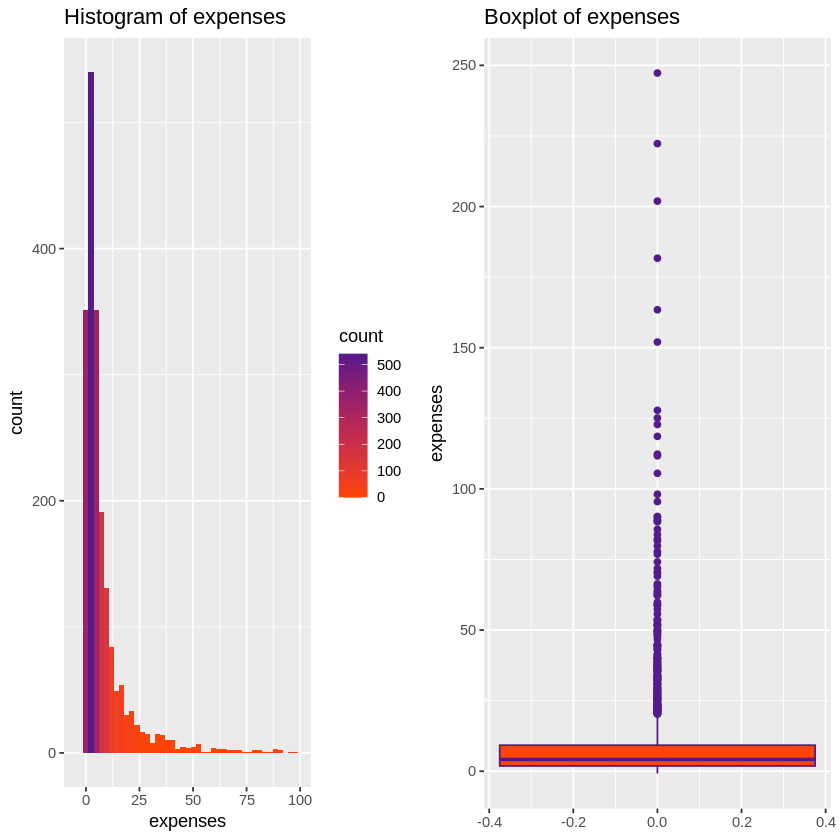

In [38]:
hist <- ggplot(Forbes2000, aes(x = expenses, fill = after_stat(count)))+
  geom_histogram(bins = round(sqrt(nrow(Forbes2000))), linewidth = 0.5, na.rm = TRUE)+ # histogram
  xlim(-5, 100)+ # x limits
  ggtitle("Histogram of expenses")+ # title
  scale_fill_gradient("count", low = "orangered", high = "purple4") # colour

box <- ggplot(Forbes2000, aes(y = expenses))+
  geom_boxplot(col = "purple4", fill = "orangered", na.rm = TRUE)+ # boxplot
  ggtitle("Boxplot of expenses")
  grid.arrange(hist, box, ncol = 2) # histogram and boxplot in the same graph

In [17]:
dev.off()

null device 
          1

At a quick glance, one might notice, initially, that there are negative values, which is surprising, since this would mean that there are businesses with profits higher than sales. Moreover, the median is quite different from the mean, which is at least 2 times larger than it.

This can easily be connected to the fact that the maximum value is quite high and "witnesses" the existence of extreme values (outliers), which "pull" the average upwards.

Finally, there are only 5 NA's values, which we can comfortably omit in our calculations, since these are less than 1% of our data and will not affect our results.

On the left, in the histogram of business expenses, all the
that there are some minimal negative values as well as some fairly large positive ones most of the observations lie outside the upper limit of the thegogram, in terms of their monetary size.

On the right, there is the boxplot with all the cost location points clearly visible can be seen from the dimensions of the "box". It is immediately noticeable that in one most of the observations lie outside the upper limit of the boxplot, which makes them candidate outliers.

In [23]:
us_table <- table(Forbes2000$US)
addmargins(us_table)
round(addmargins(prop.table(us_table))*100, 1)


    American Non-American          Sum 
         751         1249         2000 


    American Non-American          Sum 
        37.5         62.5        100.0 

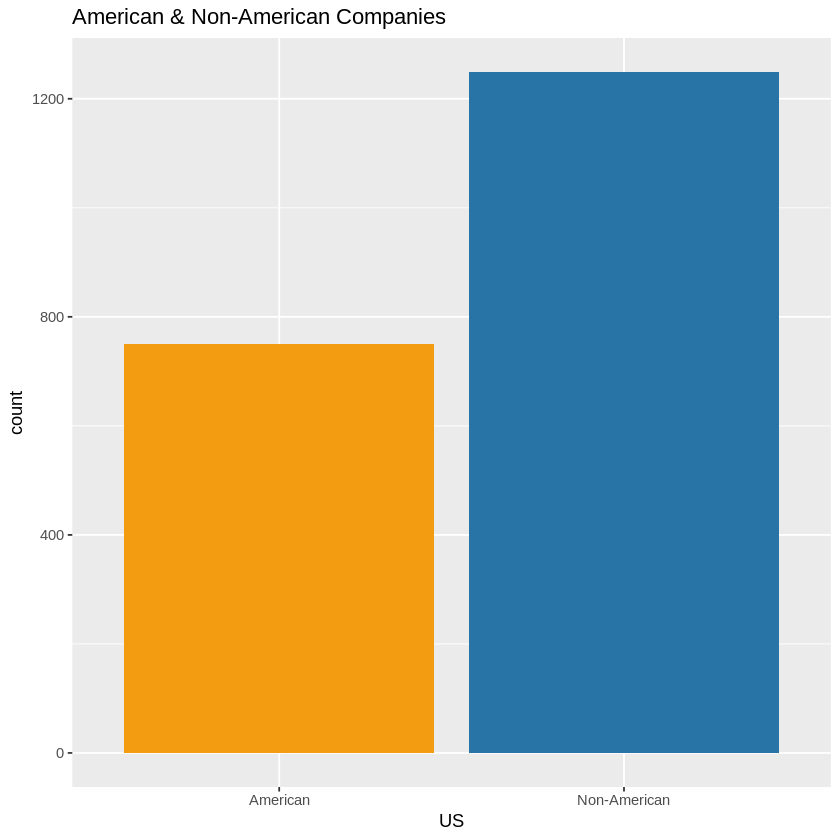

In [39]:
ggplot(Forbes2000, aes(x = US))+
geom_bar(stat = "count", fill = c("#F39C12", "#2874A6"))+
labs(title = "American & Non‐American Companies")

### Top 10 companies

In [40]:
Forbes2000 %>% select(name, country, category) %>% head(10)
Forbes2000 %>% select(name, sales, profits, assets) %>% head(10)

name,country,category
<chr>,<fct>,<fct>
Citigroup,United States,Banking
General Electric,United States,Conglomerates
American Intl Group,United States,Insurance
ExxonMobil,United States,Oil & gas operations
BP,United Kingdom,Oil & gas operations
Bank of America,United States,Banking
HSBC Group,United Kingdom,Banking
Toyota Motor,Japan,Consumer durables
Fannie Mae,United States,Diversified financials


name,sales,profits,assets
<chr>,<dbl>,<dbl>,<dbl>
Citigroup,94.71,17.85,1264.03
General Electric,134.19,15.59,626.93
American Intl Group,76.66,6.46,647.66
ExxonMobil,222.88,20.96,166.99
BP,232.57,10.27,177.57
Bank of America,49.01,10.81,736.45
HSBC Group,44.33,6.66,757.60
Toyota Motor,135.82,7.99,171.71
Fannie Mae,53.13,6.48,1019.17


### Greek companies

In [45]:
ForbesGR1000 <- Forbes2000 %>% head(1000) %>% filter(country == "Greece")
summary(ForbesGR1000)

      rank           name                                country 
 Min.   :578.0   Length:5           Greece                   :5  
 1st Qu.:618.0   Class :character   Africa                   :0  
 Median :658.0   Mode  :character   Australia                :0  
 Mean   :711.8                      Australia/ United Kingdom:0  
 3rd Qu.:850.0                      Austria                  :0  
 Max.   :855.0                      Bahamas                  :0  
                                    (Other)                  :0  
                         category     sales          profits    
 Banking                     :3   Min.   :1.980   Min.   :0.18  
 Telecommunications services :1   1st Qu.:2.050   1st Qu.:0.19  
 Utilities                   :1   Median :3.470   Median :0.22  
 Aerospace & defense         :0   Mean   :3.124   Mean   :0.30  
 Business services & supplies:0   3rd Qu.:3.590   3rd Qu.:0.41  
 Capital goods               :0   Max.   :4.530   Max.   :0.50  
 (Other)         

### Μέση τιμή

In [47]:
countries_mean <- Forbes2000 %>% group_by(country) %>%
  summarise_at(c("sales", "profits", "assets"), mean, na.rm = TRUE)
as_tibble(countries_mean)

country,sales,profits,assets
<fct>,<dbl>,<dbl>,<dbl>
Africa,6.820000,-0.00500000,11.220000
Australia,5.244595,0.50222222,28.827297
Australia/ United Kingdom,11.595000,1.17500000,17.370000
Austria,4.142500,0.10750000,24.205000
Bahamas,1.350000,0.20000000,3.620000
Belgium,10.114444,0.39333333,79.911111
Bermuda,6.840500,0.45550000,13.845500
Brazil,6.338667,0.45200000,18.376667
Canada,6.429643,0.41607143,32.971786


In [48]:
mean_of_sales10 <- filter(countries_mean, sales > 10) %>% select(country, profits, sales)
as_tibble(mean_of_sales10)

country,profits,sales
<fct>,<dbl>,<dbl>
Australia/ United Kingdom,1.17500000,11.59500
Belgium,0.39333333,10.11444
Finland,0.64090909,10.29182
France,0.11698413,20.10206
Germany,-0.03815385,20.78138
Italy,0.18341463,10.21390
Japan,0.02237342,10.19063
Korea,0.03000000,15.00500
Luxembourg,-0.12500000,14.18500


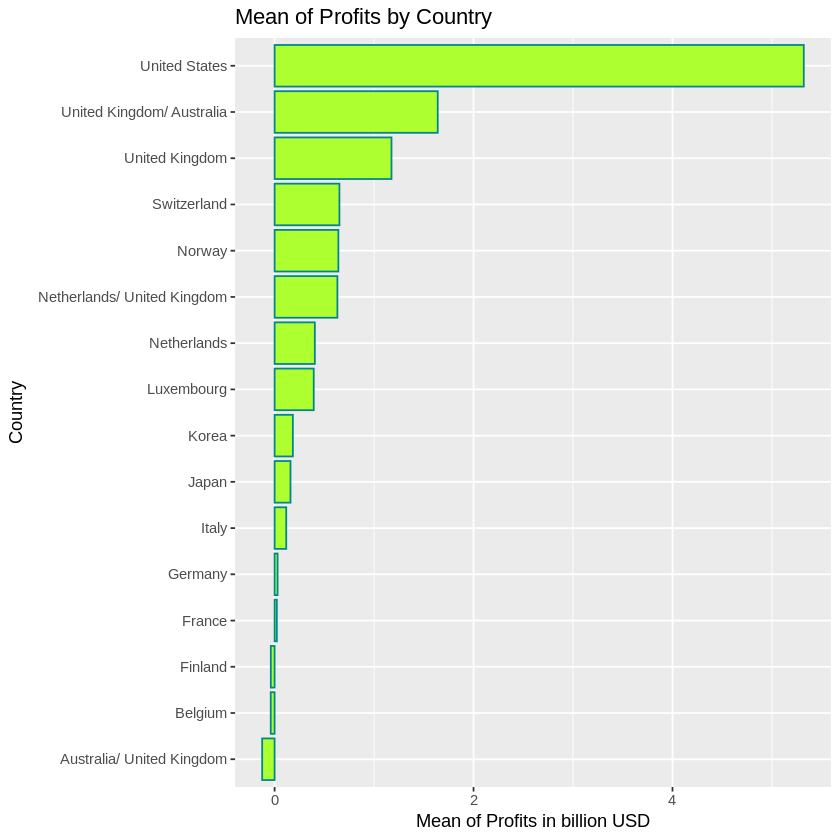

In [49]:
ggplot(mean_of_sales10, aes(x = sort(profits), y = country))+
geom_bar(stat = "identity", col = "turquoise4", fill = "greenyellow")+
labs(title = "Mean of Profits by Country",
x = "Mean of Profits in billion USD",
y = "Country")

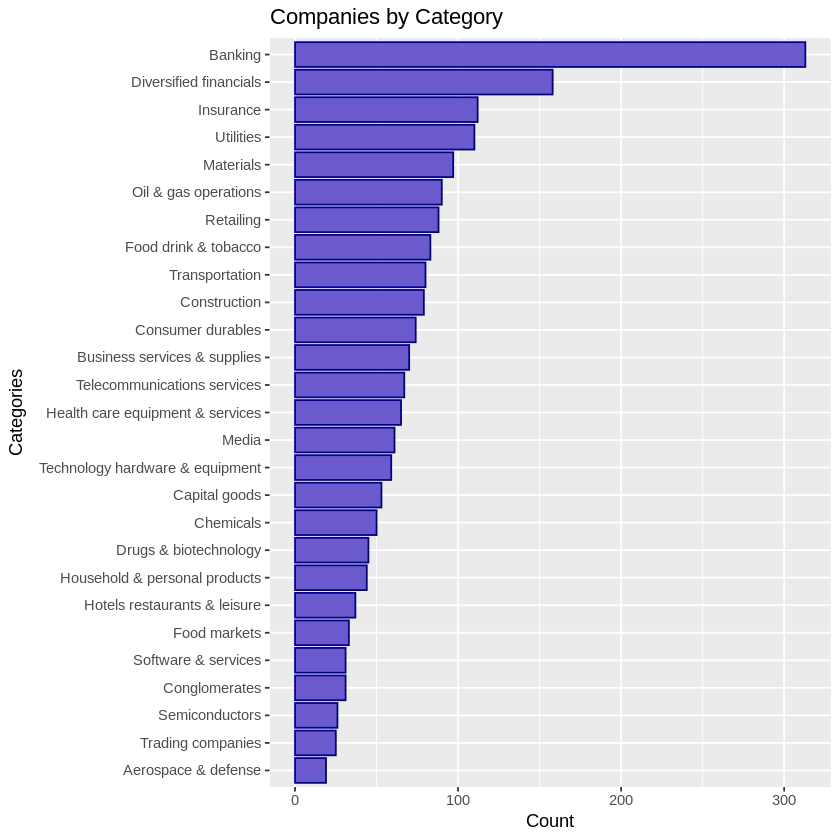

In [50]:
ggplot(Forbes2000, aes(y = reorder(category, category, function (x) length(x))))+
geom_bar(stat = "count", col = "darkblue", fill = "slateblue")+
labs(title = "Companies by Category",
x = "Count",
y = "Categories")

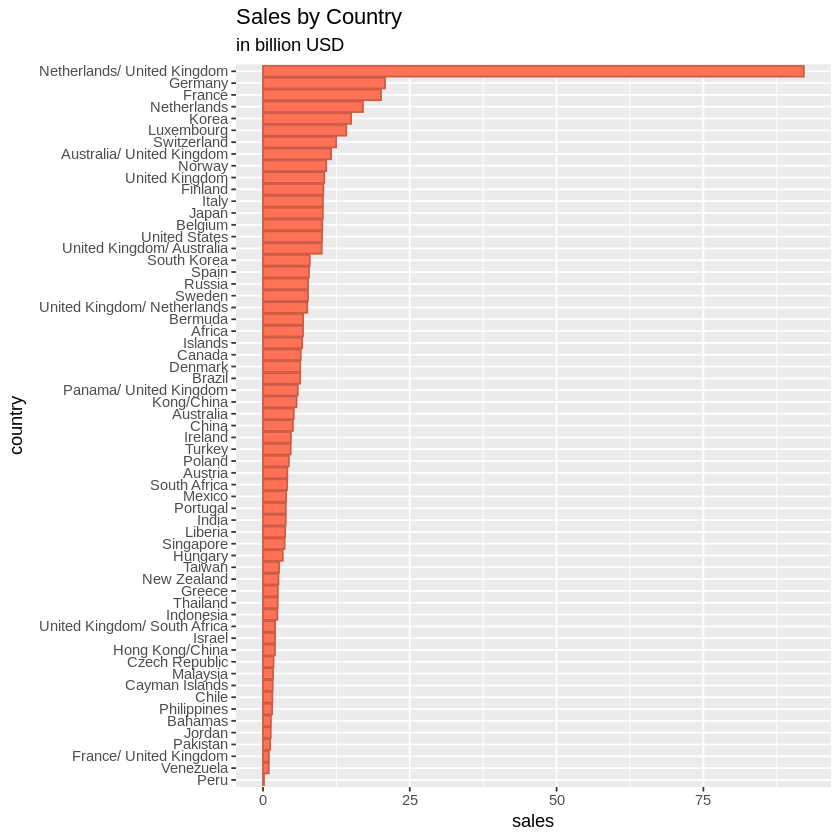

In [54]:
countries_mean_bysales <- countries_mean[order(-countries_mean$sales), ]
ggplot(countries_mean_bysales, aes(x = sales, y = reorder(country, sales)))+
geom_bar(stat = "identity", col = "coral3", fill = "coral1")+
labs(title = "Sales by Country", subtitle = "in billion USD", y = "country")

### Correlation

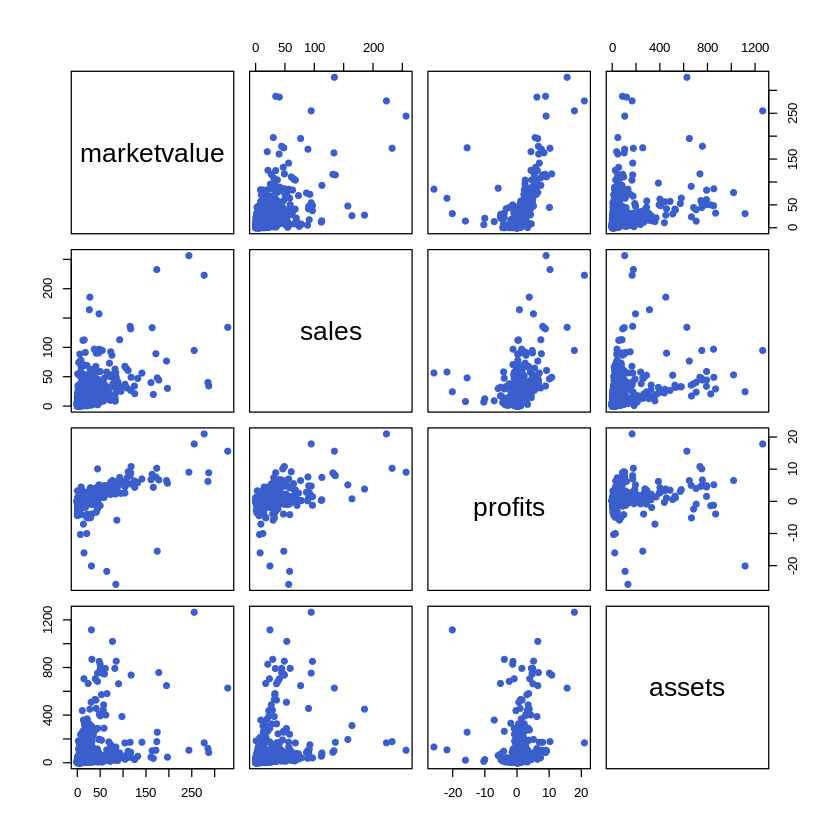

In [55]:
plot(Forbes2000[c("marketvalue", "sales", "profits", "assets")],
col = "royalblue3",
pch = 19) # shape of points

### 3D scatter-plot

### Boxplots

In [59]:
countries_dis <- subset(Forbes2000, country %in% c("Israel", "Turkey", "Greece"))[c("country", "profits")]
countries_dis$country <- factor(countries_dis$country)
country_bymedian <- with(countries_dis, reorder(country, profits, median))

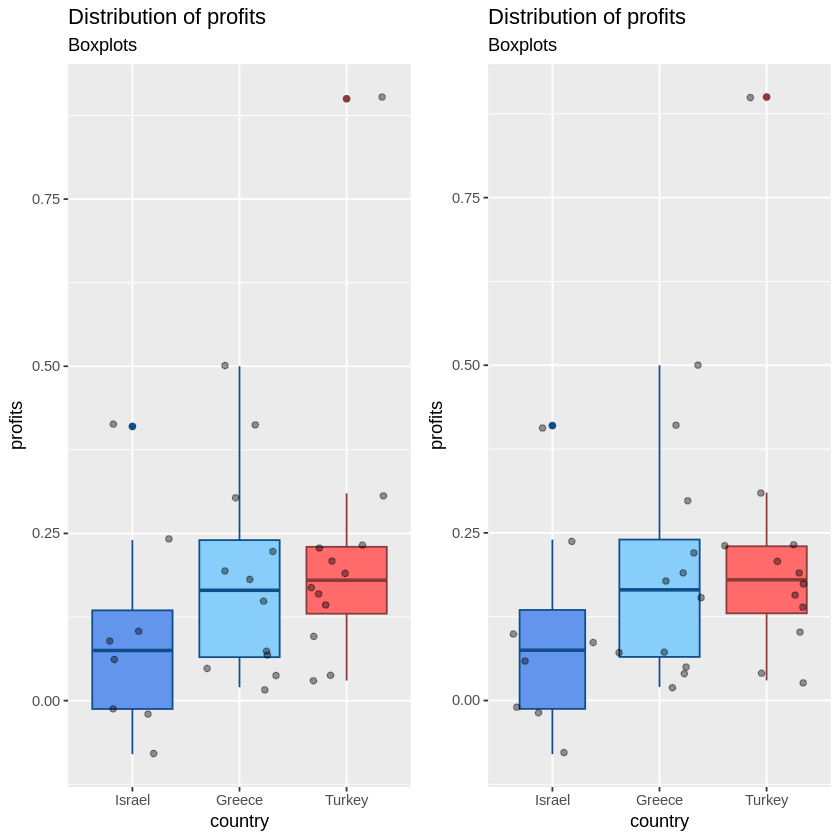

In [60]:
bxp1 <- ggplot(countries_dis, aes(x = country_bymedian, y = profits))+
  geom_boxplot(varwidth = FALSE,
  col = c("dodgerblue4", "dodgerblue4", "indianred4"),
  fill = c("cornflowerblue", "lightskyblue", "indianred1"))+
  labs(title = "Distribution of profits",
  subtitle = "Boxplots",
  x = "country")+
  geom_jitter(alpha = 0.4)

bxp2 <- ggplot(countries_dis, aes(x = country_bymedian, y = profits))+
geom_boxplot(varwidth = TRUE,
col = c("dodgerblue4", "dodgerblue4", "indianred4"),
fill = c("cornflowerblue", "lightskyblue", "indianred1"))+
labs(title = "Distribution of profits",
subtitle = "Boxplots",
x = "country")+
geom_jitter(alpha = 0.4)
grid.arrange(bxp1, bxp2, ncol = 2)

### Measures of centrality and dispersion

In [61]:
Forbes2000 %>%
  select(country, profits) %>%
  group_by(country) %>%
  summarise(profits.mean = mean(profits),
  profits.median = median(profits),
  profits.cv = cv(profits))

country,profits.mean,profits.median,profits.cv
<fct>,<dbl>,<dbl>,<dbl>
Africa,-0.00500000,-0.005,-18.38
Australia,NA,NA,1.32
Australia/ United Kingdom,1.17500000,1.175,1.15
Austria,0.10750000,0.055,1.23
Bahamas,0.20000000,0.200,NA
Belgium,0.39333333,0.200,1.18
Bermuda,0.45550000,0.395,0.71
Brazil,0.45200000,0.330,1.25
Canada,0.41607143,0.290,1.34


In [62]:
Forbes2000 %>%
  select(sales, category, US) %>%
  group_by(category, US) %>%
  summarize(sales.median = median(sales, na.rm = TRUE))

`summarise()` has grouped output by 'category'. You can override using the
`.groups` argument.


category,US,sales.median
<fct>,<fct>,<dbl>
Aerospace & defense,American,16.915
Aerospace & defense,Non-American,9.320
Banking,American,1.270
Banking,Non-American,1.495
Business services & supplies,American,2.290
Business services & supplies,Non-American,4.550
Capital goods,American,7.290
Capital goods,Non-American,5.640
Chemicals,American,5.610


In [63]:
Forbes11 <- Forbes2000 %>% select(-c(assets, marketvalue)) %>% tail(-100)
str(Forbes11)

tibble [1,900 × 9] (S3: tbl_df/tbl/data.frame)
 $ rank      : int [1:1900] 101 102 103 104 105 106 107 108 109 110 ...
 $ name      : chr [1:1900] "Target" "Coca-Cola" "Lehman Bros Holdings" "PepsiCo" ...
 $ country   : Factor w/ 61 levels "Africa","Australia",..: 60 60 60 60 56 9 60 16 50 2 ...
 $ category  : Factor w/ 27 levels "Aerospace & defense",..: 20 11 9 11 16 2 1 10 19 18 ...
 $ sales     : num [1:1900] 46.6 21 17.1 27 38.2 ...
 $ profits   : num [1:1900] 1.7 4.35 1.47 3.49 0.72 1.88 0.7 2.29 2.05 1.22 ...
 $ expenses  : num [1:1900] 44.9 16.7 15.6 23.5 37.5 ...
 $ US        : Factor w/ 2 levels "American","Non-American": 1 1 1 1 2 2 1 2 2 2 ...
 $ profitable: Factor w/ 2 levels "Profitable","Unprofitable": 1 1 1 1 1 1 1 1 1 1 ...
